<h1> ______________________________________ </h1>

<h1> Full NEXT100 with fiber panels simulation mapping analysis </h1>
<h1> ______________________________________ </h1>

<p style="font-size: 17px; color: black;"> In this Notebook we take as input the maps created in the previous notebook and use it to simulate an s2 signal for bb0nu events. </p>




<h1> ____________ </h1>
<h2> This version </h2>
<h1> ____________ </h1>

-  <p style="font-size: 17px; color: black;"> 100K ie S2 events. </p>
-  <p style="font-size: 17px; color: black;"> Mapping separated by sensors. </p>

-  <p style="font-size: 17px; color: black;"> Geant4 fundamental units: </p>

 -  <p style="font-size: 17px; color: black;"> Length [L]: mm (milimeter) </p>
 -  <p style="font-size: 17px; color: black;"> Time [T]: ns (nanosecond) </p>
 -  <p style="font-size: 17px; color: black;"> Energy [E]: MeV (megaelectronvolt) </p>





In [1]:
import numpy              as np
import pandas             as pd

import scipy              
from scipy                import stats, integrate
from scipy.signal         import convolve

import matplotlib.pyplot  as plt

from matplotlib.ticker    import FormatStrFormatter # to set the format of the plot's axis
from matplotlib.patches   import Rectangle # To add blanck spaces in tabular legends

import os
import math
import tables             as tb

In [2]:
path = '/home/investigator/mariandbt/python/data'
path = path + '/20231025_NEXT100_full_mapping'

# filename = os.path.join(path, "bb0nu_s2_signal.h5")
# filename = os.path.join(path, "20231215_bb0nu_s2_signal.h5")
filename = os.path.join(path, "20231218_bb0nu_s2_signal.h5")


with tb.open_file(filename) as file:
    print(file)

/home/investigator/mariandbt/python/data/20231025_NEXT100_full_mapping/20231218_bb0nu_s2_signal.h5 (File) ''
Last modif.: '2023-12-18T09:56:31+00:00'
Object Tree: 
/ (RootGroup) ''
/sens_200 (Array(109684, 2)) ''
/sens_201 (Array(109684, 2)) ''
/sens_202 (Array(109684, 2)) ''
/sens_203 (Array(109684, 2)) ''
/sens_204 (Array(109684, 2)) ''
/sens_205 (Array(109684, 2)) ''
/sens_206 (Array(109684, 2)) ''
/sens_207 (Array(109684, 2)) ''
/sens_208 (Array(109684, 2)) ''
/sens_209 (Array(109684, 2)) ''
/sens_210 (Array(109684, 2)) ''
/sens_211 (Array(109684, 2)) ''
/sens_212 (Array(109684, 2)) ''
/sens_213 (Array(109684, 2)) ''
/sens_214 (Array(109684, 2)) ''
/sens_215 (Array(109684, 2)) ''
/sens_216 (Array(109684, 2)) ''
/sens_217 (Array(109684, 2)) ''
/sens_218 (Array(109684, 2)) ''
/sens_219 (Array(109684, 2)) ''
/sens_220 (Array(109684, 2)) ''
/sens_221 (Array(109684, 2)) ''
/sens_222 (Array(109684, 2)) ''
/sens_223 (Array(109684, 2)) ''
/sens_224 (Array(109684, 2)) ''
/sens_225 (Array(10

In [3]:
import h5py

# Load the 3D dictionary from the HDF5 file
loaded_data_dict = {}

columns = {0:'time',
           1:'s2'
          }

with h5py.File(filename, 'r') as file:
    for table_id in file.keys():
        # Get the column names from the HDF5 attributes
        loaded_data_dict[table_id] = pd.DataFrame(file[table_id][:])
        loaded_data_dict[table_id].rename(columns = columns, inplace=True)



In [4]:
s2_dict = loaded_data_dict.copy()

In [5]:
s2_dict.keys()

dict_keys(['sens_200', 'sens_201', 'sens_202', 'sens_203', 'sens_204', 'sens_205', 'sens_206', 'sens_207', 'sens_208', 'sens_209', 'sens_210', 'sens_211', 'sens_212', 'sens_213', 'sens_214', 'sens_215', 'sens_216', 'sens_217', 'sens_218', 'sens_219', 'sens_220', 'sens_221', 'sens_222', 'sens_223', 'sens_224', 'sens_225', 'sens_226', 'sens_227', 'sens_228', 'sens_229', 'sens_230', 'sens_231', 'sens_232', 'sens_233', 'sens_234', 'sens_235', 'sens_236', 'sens_237', 'sens_238', 'sens_239', 'sens_240', 'sens_241', 'sens_242', 'sens_243', 'sens_244', 'sens_245', 'sens_246', 'sens_247', 'sens_248', 'sens_249', 'sens_250', 'sens_251', 'sens_252', 'sens_253', 'sens_254', 'sens_255', 'sens_256', 'sens_257', 'sens_258', 'sens_259', 'sens_260', 'sens_261', 'sens_262', 'sens_263', 'sens_264', 'sens_265', 'sens_266', 'sens_267', 'sens_268', 'sens_269', 'sens_270', 'sens_271', 'sens_272', 'sens_273', 'sens_274', 'sens_275', 'sens_276', 'sens_277', 'sens_278', 'sens_279', 'sens_280', 'sens_281', 'sens

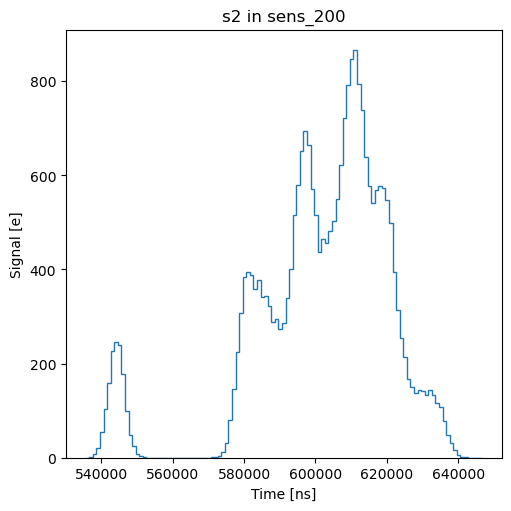

In [6]:
sensor = 'sens_200'

signal = s2_dict[sensor]

t = signal.time
s2 = signal.s2

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), constrained_layout=True)

bin_width = 1000 # [ns] = 1 [us]
binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
font_size = 8.5

events, bins, bars = ax.hist(t, binin, 
                             weights = s2,
                             density=False,
                             label='s2', 
                             histtype='step')

ax.set_title(f's2 in {sensor}');
ax.set_xlabel('Time [ns]');
ax.set_ylabel('Signal [e]');

In [7]:
len(bins)

112

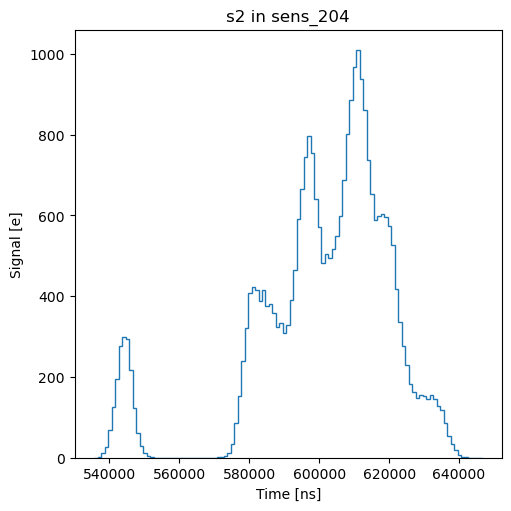

In [8]:
sensor = 'sens_204'

signal = s2_dict[sensor]

t = signal.time
s2 = signal.s2

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), constrained_layout=True)

bin_width = 1000 # [ns] = 1 [us]
binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
font_size = 8.5

events, bins, bars = ax.hist(t, binin, 
                             weights = s2,
                             density=False,
                             label='s2', 
                             histtype='step')

ax.set_title(f's2 in {sensor}');
ax.set_xlabel('Time [ns]');
ax.set_ylabel('Signal [e]');

In [9]:
hist_max = np.array([])
hist_max_sens = np.array([])

for sensor in s2_dict.keys():
    signal = s2_dict[sensor]

    t = signal.time
    s2 = signal.s2

    bin_width = 1000 # [ns] = 1 [us]
    binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
    font_size = 8.5

    # Create a histogram
    hist_values, bin_edges = np.histogram(t, bins=binin,
                                          weights = s2)

    hist_max = np.append(hist_max, hist_values.max())
    hist_max_sens = np.append(hist_max_sens, sensor)
    

In [10]:
hist_max.max()

1067.7581710897211

In [11]:
str(hist_max_sens[hist_max == hist_max.max()][0])

'sens_287'

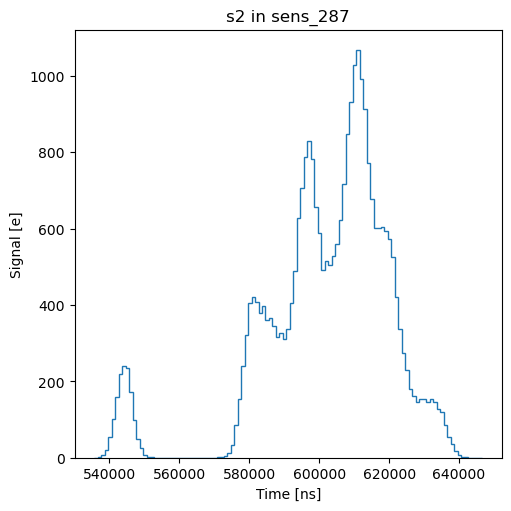

In [12]:
sensor = str(hist_max_sens[hist_max == hist_max.max()][0])

signal = s2_dict[sensor]

t = signal.time
s2 = signal.s2

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), constrained_layout=True)

bin_width = 1000 # [ns] = 1 [us]
binin = np.arange(t.min() - bin_width, t.max() + 2*bin_width, bin_width)
font_size = 8.5

events, bins, bars = ax.hist(t, binin, 
                             weights = s2,
                             density=False,
                             label='s2', 
                             histtype='step')

ax.set_title(f's2 in {sensor}');
ax.set_xlabel('Time [ns]');
ax.set_ylabel('Signal [e]');